In [2]:
#Configuracion inicial
import matplotlib.pyplot as plt  #librería para graficas de python
import numpy  # extiende las librerias de matemática de python
import pandas  #libreria para procesamiento de datos muy usada en la industria
import seaborn  # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

data = pandas.read_csv('data/case1/lab3_1.0_excel.csv')
data

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
0,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,configname,General,NaN,NaN,NaN
1,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,datetime,20220705-07:34:28,NaN,NaN,NaN
2,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,experiment,General,NaN,NaN,NaN
3,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN,NaN
4,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN,NaN
5,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN,NaN
6,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,measurement,NaN,NaN,NaN,NaN
7,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,network,Network,NaN,NaN,NaN
8,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,processid,1279,NaN,NaN,NaN
9,General-0-20220705-07:34:28-1279,runattr,NaN,NaN,repetition,0,NaN,NaN,NaN


In [3]:
data.columns

Index(['run', 'type', 'module', 'name', 'attrname', 'attrvalue', 'value',
       'vectime', 'vecvalue'],
      dtype='object')

In [4]:
time_gen = data['vectime'].loc[[20]].tolist()
buffer_gen = data['vecvalue'].loc[[20]].tolist()

time_queue = data['vectime'].loc[[21]].tolist()
buffer_queue = data['vecvalue'].loc[[21]].tolist()

time_sink = data['vectime'].loc[[22]].tolist()
buffer_sink = data['vecvalue'].loc[[22]].tolist()



In [5]:
time_gen = list(map(float, (time_gen[0]).split()))
time_queue = list(map(float, (time_queue[0]).split()))
time_sink = list(map(float, (time_sink[0]).split()))
buffer_gen = list(map(float, (buffer_gen[0]).split()))
buffer_queue = list(map(float, (buffer_queue[0]).split()))
buffer_sink = list(map(float, (buffer_sink[0]).split()))



<function matplotlib.pyplot.show(close=None, block=None)>

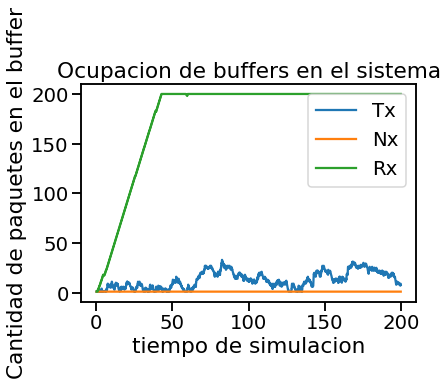

In [6]:
plt.plot(time_gen, buffer_gen, color='tab:blue', label="Tx")
plt.plot(time_queue, buffer_queue, color='tab:orange', label="Nx")
plt.plot(time_sink, buffer_sink, color='tab:green', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

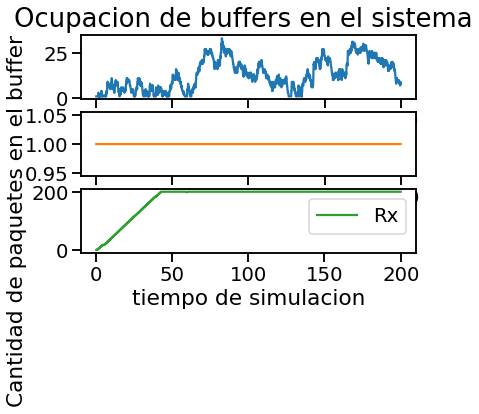

In [7]:
fig, ax = plt.subplots(3)
fig.suptitle('Ocupacion de buffers en el sistema')
ax[0].plot(time_gen, buffer_gen, color='tab:blue', label="Tx")
ax[1].plot(time_queue, buffer_queue, color='tab:orange', label="Nx")
ax[2].plot(time_sink, buffer_sink, color='tab:green', label="Rx")
plt.title('')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

1979
998
770


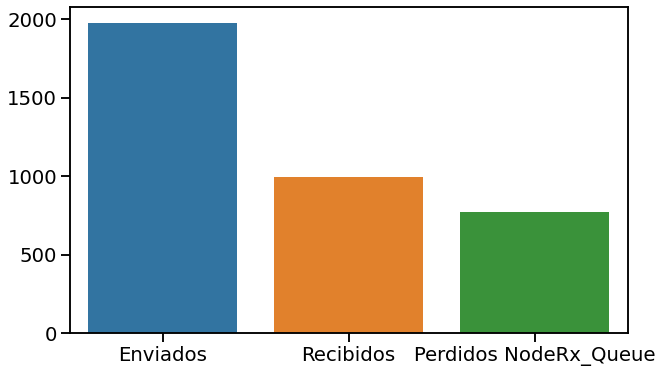

In [8]:
#Agregue en el modelo un contador de paquetes generados y paquetes consumidos
#sacando la info
time_gen = data['vectime'].loc[[19]].tolist()
packets_gen = data['vecvalue'].loc[[19]].tolist()
time_sink = data['vectime'].loc[[24]].tolist()
packets_sink = data['vecvalue'].loc[[24]].tolist()

time_nodeRx_queue = data['vectime'].loc[[25]].tolist()
lost_nodeRx_queue = data['vecvalue'].loc[[25]].tolist()

#dividiendo en listas
time_gen = list(map(float, time_gen[0].split()))
packets_sink = list(map(float, packets_sink[0].split()))
time_sink = list(map(float, time_sink[0].split()))
packets_gen = list(map(float, packets_gen[0].split()))

time_nodeRx_queue = list(map(float, time_nodeRx_queue[0].split()))
lost_nodeRx_queue = list(map(float, lost_nodeRx_queue[0].split()))

plt.figure(figsize=(10, 6))
seaborn.barplot(
    x=['Enviados', 'Recibidos','Perdidos NodeRx_Queue'],
    y=[len(packets_gen), len(packets_sink),len(lost_nodeRx_queue)])
print(len(packets_gen))
print(len(packets_sink))
print(len(lost_nodeRx_queue))

In [9]:
data = pandas.read_csv('test1Records.csv')
data

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220730-14:30:16-12862,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220730-14:30:16-12862,runattr,NaN,NaN,datetime,20220730-14:30:16,NaN,NaN
2,General-0-20220730-14:30:16-12862,runattr,NaN,NaN,datetimef,20220730-143016,NaN,NaN
3,General-0-20220730-14:30:16-12862,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220730-14:30:16-12862,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
...,...,...,...,...,...,...,...,...
58,General-0-20220730-14:30:16-12862,vector,Network.node[0].net,Delay_per_node,NaN,NaN,1.880020054203 1.978162426393 2.533902621424 2...,0 1.0001 0 1.516497895052 0 1.0001 0 1.9089389...
59,General-0-20220730-14:30:16-12862,vector,Network.node[5].net,packetHops,NaN,NaN,1.899716388484 2.860760212075 2.899716388484 3...,2 2 2 3 3 2 2 4 3 2 3 4 4 2 2 3 2 4 3 3 2 4 2 ...
60,General-0-20220730-14:30:16-12862,vector,Network.node[5].net,Delay_per_node,NaN,NaN,1.899716388484 2.860760212075 2.899716388484 3...,1.0001 1.0001 1.681743859158 3.545501249346 2....
61,General-0-20220730-14:30:16-12862,vector,Network.node[7].net,packetHops,NaN,NaN,1.952601335884 2.792034188784 2.865719544249 2...,0 0 0 2 0 3 2 0 0 3 0 2 0 3 2 3 0 3 0 0 0 2 3 ...
